In [86]:
#load Library 
import pandas as pd 
import numpy as np 
import joblib 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from pycaret.classification import *
import seaborn as sns 


In [58]:
#Read Dataset
df = pd.read_csv("C:/Users/MyBook Hype AMD/Project/depression prediction/data/Depression Student Dataset.csv")
df.head(10)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
5,Male,19,4.0,4.0,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes
6,Female,34,4.0,2.0,More than 8 hours,Moderate,Yes,6,2,No,Yes
7,Female,20,4.0,1.0,More than 8 hours,Healthy,Yes,3,4,Yes,Yes
8,Female,33,1.0,4.0,More than 8 hours,Moderate,No,10,3,No,No
9,Male,33,4.0,3.0,Less than 5 hours,Unhealthy,Yes,10,1,No,Yes


In [7]:
df.isna()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
497,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,False,False,False,False


## Exploring Categorical Data

In [ ]:
#Gender
df["Gender"].value_counts()

Gender
Male      267
Female    235
Name: count, dtype: int64

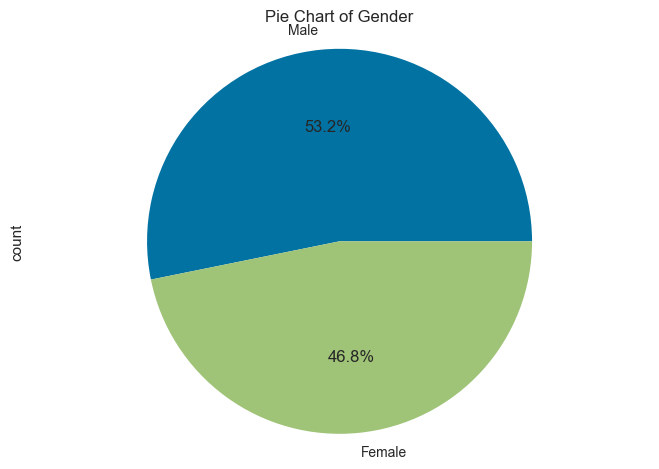

In [9]:
#Visualization for Gender 
df["Gender"].value_counts().plot.pie(
    autopct = '%1.1f%%',
    title = "Pie Chart of Gender"
)

plt.axis('equal') #applied to any piechart, and only for piechart
plt.show()

In [11]:
df["Sleep Duration"].value_counts()

Sleep Duration
7-8 hours            128
More than 8 hours    128
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64

<Axes: title={'center': 'Barplot of Sleep Duration'}, xlabel='Sleep Duration'>

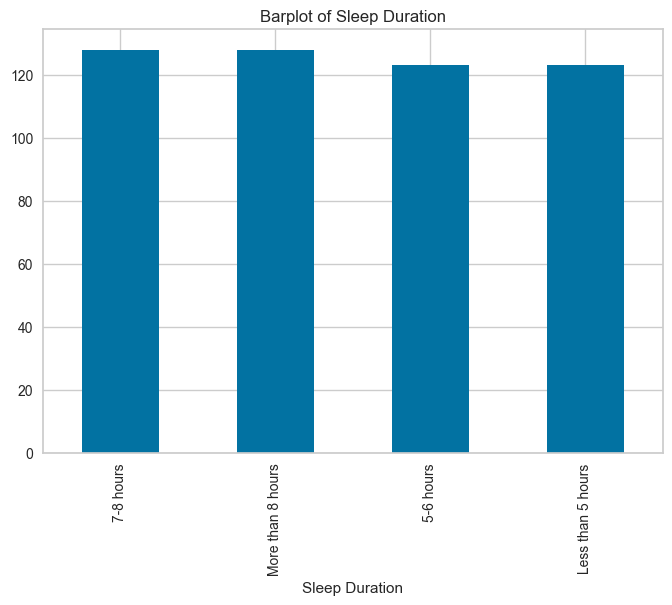

In [13]:
df["Sleep Duration"].value_counts().plot.bar(title = "Barplot of Sleep Duration")

<Axes: title={'center': 'Suicidal Thought'}, ylabel='count'>

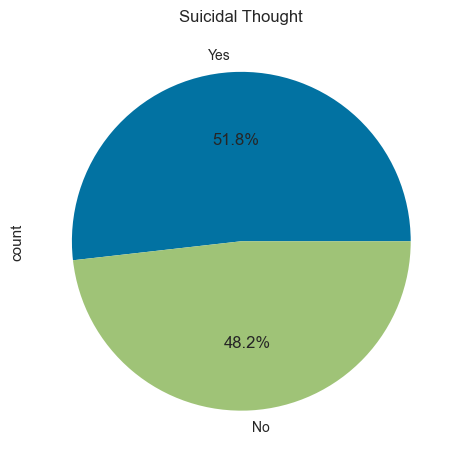

In [16]:
df["Have you ever had suicidal thoughts ?"].value_counts().plot.pie(autopct = '%1.1f%%',title = "Suicidal Thought")

<Axes: title={'center': 'Dietary Habits'}, ylabel='count'>

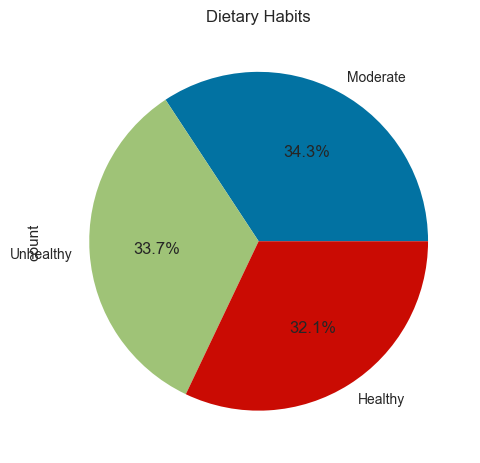

In [17]:
df["Dietary Habits"].value_counts().plot.pie(autopct = '%1.1f%%', title = "Dietary Habits")

<Axes: title={'center': 'Family History Of Mental Illnes'}, xlabel='Family History of Mental Illness'>

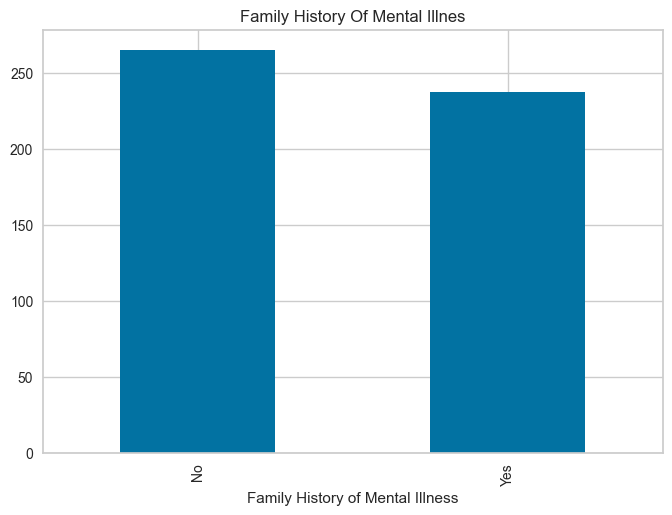

In [20]:
df["Family History of Mental Illness"].value_counts().plot.bar(title = "Family History Of Mental Illnes")

<Axes: title={'center': 'Barplot Of Depression'}, xlabel='Depression'>

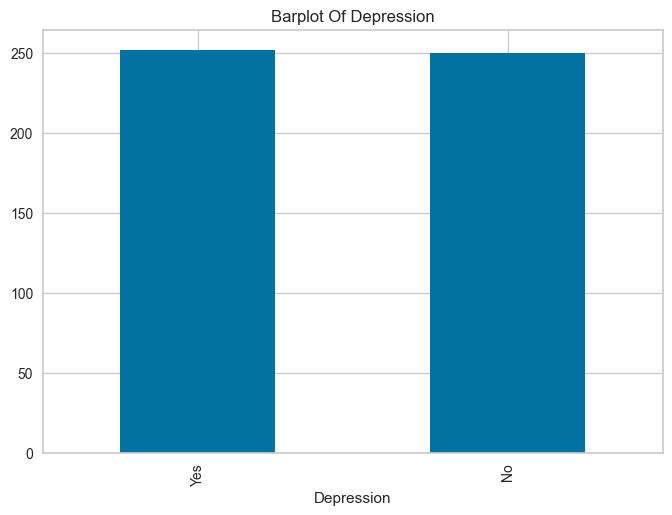

In [21]:
df["Depression"].value_counts().plot.bar(title = "Barplot Of Depression")

## Exploring Numerical Data

<Axes: title={'center': 'Barplot of Age'}, ylabel='Frequency'>

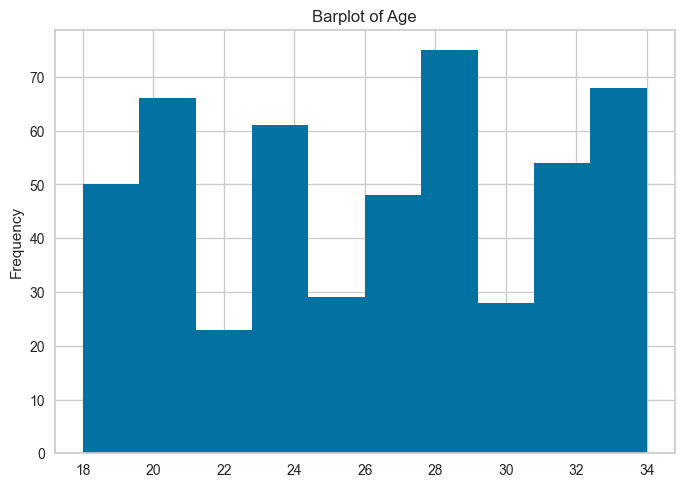

In [26]:
df["Age"].plot.hist(title = "Barplot of Age")

In [27]:
df["Age"].describe()

count    502.000000
mean      26.241036
std        4.896501
min       18.000000
25%       22.000000
50%       26.500000
75%       30.000000
max       34.000000
Name: Age, dtype: float64

In [28]:
df["Age"].mode()

0    28
Name: Age, dtype: int64

## Data Modification

In [59]:
kategori = {
    "7-8 hours": 1,
    "More than 8 hours": 2,
    "5-6 hours": 3,
    "Less than 5 hours": 4
}

df["Sleep Duration"] = df["Sleep Duration"].map(kategori)

df["Sleep Duration"]

0      1
1      3
2      3
3      2
4      2
      ..
497    2
498    4
499    3
500    2
501    2
Name: Sleep Duration, Length: 502, dtype: int64

In [60]:
dd = {
    "Male" : 1,
    "Female" :2
}

df["Gender"] = df["Gender"].map(dd)
df["Gender"]

0      1
1      1
2      1
3      1
4      2
      ..
497    1
498    1
499    2
500    1
501    1
Name: Gender, Length: 502, dtype: int64

In [61]:
kk = {
    "No" : 1,
    "Yes" :2
}
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map(kk)
df["Have you ever had suicidal thoughts ?"]

0      2
1      2
2      2
3      2
4      2
      ..
497    1
498    2
499    1
500    1
501    1
Name: Have you ever had suicidal thoughts ?, Length: 502, dtype: int64

In [62]:
uu = {
    "No" : 1,
    "Yes" :2
}

df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map(uu)

In [64]:
aasd = {
    "Healthy" : 1,
    "Moderate" : 2,
    "Unhealthy" :3
}

df["Dietary Habits"] = df["Dietary Habits"].map(aasd)

In [65]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,1,2,2,9,2,2,No
1,1,28,4.0,5.0,3,1,2,7,1,2,No
2,1,25,1.0,3.0,3,3,2,10,4,1,Yes
3,1,23,1.0,4.0,2,3,2,7,2,2,No
4,2,31,1.0,5.0,2,1,2,4,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...
497,1,26,5.0,2.0,2,3,1,8,3,1,Yes
498,1,24,2.0,1.0,4,3,2,8,5,1,Yes
499,2,23,3.0,5.0,3,1,1,1,5,2,No
500,1,33,4.0,4.0,2,1,1,8,1,2,No


## Pemodelan

In [79]:
X = df.drop('Depression', axis = 1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

learner = GaussianNB()
adaboost = AdaBoostClassifier(estimator = learner, n_estimators=500)

In [80]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=1.0, n_estimators=500, random_state=None)

In [81]:
#Itung Prediksi
y_pred = adaboost.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
print(akurasi)

0.9682539682539683


In [82]:
results_df = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})

results_df

,Aktual,Prediksi
268,No,No
73,Yes,Yes
289,Yes,Yes
155,No,No
104,No,No
...,...,...
176,No,No
321,Yes,Yes
153,No,No
467,Yes,Yes


In [87]:
joblib.dump(adaboost, "model.pkl")

['model.pkl']